In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse
plt.rcParams.update({'xtick.labelsize': 18, 'ytick.labelsize': 18})
mpl.rcParams['font.family'] = 'Times New Roman'

In [ ]:
# supressing future warnings about pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# reading and setting up the data to be pca-d
df = pd.read_csv("pca.csv")
df = df[df.type == 'con']
# df = df[df.type == 'spd'] # uncomment to test pca on spd
df.reset_index(inplace=True)
grouped = df.groupby(['day', 'type'])
gidxs = []
glabels = []
for gl, gdf in grouped:
    glabels.append(gl)
    gidxs.append(gdf.index)
group_labels = [f"{second} day {first}" for first, second in glabels]

In [ ]:
# conductint PCA
X = df[['sgw', 'mtt', 'sod', 'acp', 'pro']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

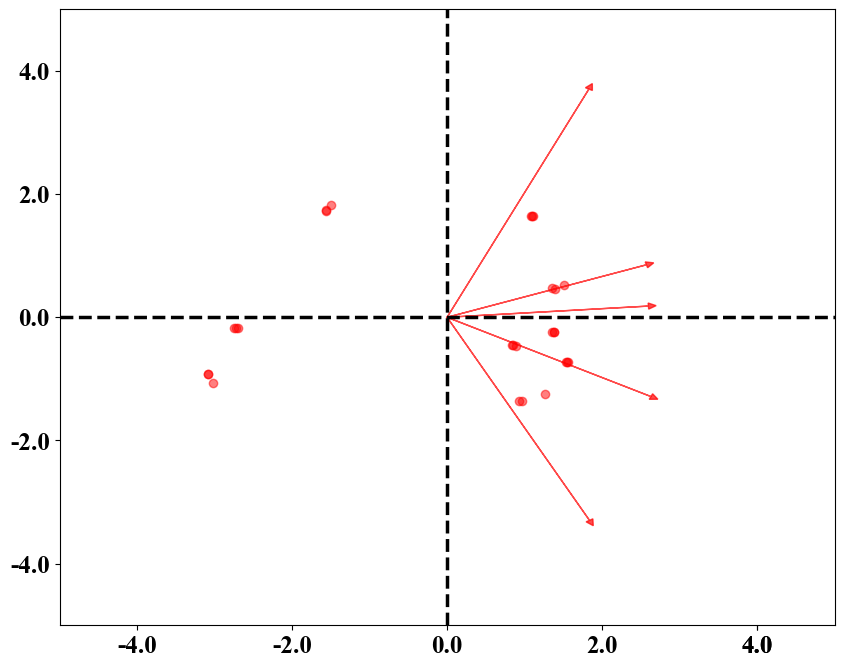

In [ ]:
# plotting results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

feature_names = ['SG WT', 'MTT', 'SOD', 'ACP', 'Protein']

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, color='r')
feature_vectors = pca.components_.T * np.sqrt(X.shape[0])
for i, _ in enumerate(X.columns):
    ax.arrow(0, 0, feature_vectors[i, 0], feature_vectors[i, 1], 
              color='r', alpha=0.7, head_width=0.1, head_length=0.1)
ax.axhline(0, linewidth=2.5, color='black', linestyle='--')
ax.axvline(0, linewidth=2.5, color='black', linestyle='--')

ax.set_xlabel(f'PC1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}%)', fontsize=18, fontweight='bold')
ax.set_ylabel(f'PC2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}%)', fontsize=18, fontweight='bold')

x_ticks = ax.get_xticks()[::2]
x_ticks = np.array(list(x_ticks) + [4.0])
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, fontweight='bold')

y_ticks = ax.get_yticks()[::2]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontweight='bold')

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.show()

In [70]:
loadings = pca.components_.T 
pc1_pc2_loadings = loadings[:, :2]
contribution_magnitude = np.linalg.norm(pc1_pc2_loadings, axis=1)

In [71]:
contribution_magnitude # sgwt, mtt sod acp protein

array([0.56347504, 0.50111772, 0.79508696, 0.52134511, 0.726232  ])

In [72]:
pca.components_

array([[ 0.50614208,  0.49989531,  0.35211054,  0.49489469,  0.35358491],
       [-0.24763746,  0.03498074,  0.71286846,  0.1639511 , -0.63434268]])

In [73]:
pca.explained_variance_ratio_

array([0.63396366, 0.21242963])

In [74]:
# fig, ax = plt.subplots(figsize=(10, 8))
# ax.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, color='black')
# colors = plt.cm.tab10.colors
# for i, group_idx in enumerate(gidxs):
#     group = pca_df.iloc[group_idx]
#     mean = group[['PC1', 'PC2']].mean()
#     cov = group[['PC1', 'PC2']].cov()
#     eigvals, eigvecs = np.linalg.eig(cov)
#     angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
#     width, height = 2 * np.sqrt(eigvals) 
#     ellipse = Ellipse(mean, width=width, height=height, angle=angle, alpha=0.5, color=colors[i], label=group_labels[i])
#     ax.add_patch(ellipse)
# ax.axhline(0, linewidth=1, color='gray', linestyle='--')
# ax.axvline(0, linewidth=1, color='gray', linestyle='--')
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_title('PCA w/ ellipses')
# ax.set_xlim(-5, 5)
# ax.set_ylim(-5, 5)
# ax.legend()
# plt.show()

In [75]:
# for i, _ in enumerate(X.columns):
#     ax.arrow(0, 0, feature_vectors[i, 0], feature_vectors[i, 1], 
#               color='r', alpha=0.7, head_width=0.1, head_length=0.1)
#     if i == 0:
#         ax.text(feature_vectors[i, 0] + 0.2, feature_vectors[i, 1] - 0.3, feature_names[i],
#                 color='black', ha='center', va='center', fontsize=18, fontweight='bold')
#     elif i == 1:
#         ax.text(feature_vectors[i, 0] + 0.2, feature_vectors[i, 1] + 0.2, feature_names[i],
#                 color='black', ha='center', va='center', fontsize=18, fontweight='bold')
#     elif i == 2:
#         ax.text(feature_vectors[i, 0] + 0.2, feature_vectors[i, 1] + 0.4, feature_names[i],
#                 color='black', ha='center', va='center', fontsize=18, fontweight='bold')
#     elif i == 3:
#         ax.text(feature_vectors[i, 0] + 0.4, feature_vectors[i, 1] + 0.2, feature_names[i],
#                 color='black', ha='center', va='center', fontsize=18, fontweight='bold')
#     else:
#         ax.text(feature_vectors[i, 0] + 0.2, feature_vectors[i, 1] - 0.2, feature_names[i],
#                 color='black', ha='center', va='center', fontsize=18, fontweight='bold')